In [1]:
%%capture
pip install wordcloud

In [2]:
%%capture
!pip install nltk

In [3]:
import os
import nltk
import pandas as pd
import seaborn as sns
import scipy as sp
import numpy as np

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from textblob import TextBlob, Word

from nltk.stem.snowball import SnowballStemmer

from wordcloud import WordCloud

import nltk
from nltk.tokenize import sent_tokenize

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import matplotlib.pyplot as plt

from nltk.stem.porter import PorterStemmer

from sklearn.svm import SVC
s=SVC()

In [4]:
url = "http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"

df = pd.read_json(url, compression='gzip', lines=True)
df=df.sample(150000)

In [5]:
df.head(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
662709,A3HAYQJBQ4UQV2,B002U1ZBG0,Y. Jiang,"[61, 66]","It's quite small, but really slow.On sequentia...",3,Small but very slow,1283472000,"09 3, 2010"
822293,A1YU56S5VFTZ,B003U2YCZE,L. Rothman,"[7, 7]",I have tried nearly all of the typical offerin...,5,Simply The Finest Protection Around,1323475200,"12 10, 2011"
795999,ADZ2QODSMGAUG,B003M0NURK,John B. Young,"[0, 0]",Does the job at a great price. I recommend &#...,5,"A nice, solid, adapter",1389657600,"01 14, 2014"
1518737,APG3SSTOY7039,B00ACF8XWA,Jeff Spears,"[0, 0]",The keyboard is very easy to use which is surp...,5,This is a very good keyboard and Case,1395705600,"03 25, 2014"
1249738,A2LFWJ8X817QGX,B006W8U2MU,Brett,"[0, 0]",This is a great thumb drive - it is made of me...,5,Works perfect,1387756800,"12 23, 2013"
11038,AQPSZ25KIC4R1,B00004WCIC,B. Breault,"[0, 0]",The Canon RC-1 Wireless Remote stores attached...,5,Perfect Companion for Most Canon SLRs,1393113600,"02 23, 2014"
71235,AKAIA4INJ87LY,B00009XVCZ,"ajer ""aj""","[0, 3]",Lens has AWESOME BOKEH. Thats the only reason ...,3,Awesome BOKEH of a Lens.....,1348358400,"09 23, 2012"
457026,ABXI4ZBKXVNBZ,B001F4UV6I,"Pierre M. Bessette ""necsradio""","[0, 0]",I have had this processor in my computer for a...,5,Old reliable,1372896000,"07 4, 2013"
1500679,A2UBQA85NIGLHA,B009WTYK1K,"Tim Isenhour ""Timbo""","[0, 0]","If I had to find one fault, it's in the price....",5,Works as described,1370995200,"06 12, 2013"
764753,A2690VEUY5C6WV,B003ES5ZSW,NaN,"[0, 0]",This cable is very well built and is great for...,5,High quality cable,1298592000,"02 25, 2011"


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150000 entries, 662709 to 1253140
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   reviewerID      150000 non-null  object
 1   asin            150000 non-null  object
 2   reviewerName    147772 non-null  object
 3   helpful         150000 non-null  object
 4   reviewText      150000 non-null  object
 5   overall         150000 non-null  int64 
 6   summary         150000 non-null  object
 7   unixReviewTime  150000 non-null  int64 
 8   reviewTime      150000 non-null  object
dtypes: int64(2), object(7)
memory usage: 11.4+ MB


In [7]:
df.shape

(150000, 9)

In [8]:
df["reviewText"].iloc[0]

"It's quite small, but really slow.On sequential write, the speed slowly goes up from 55k/s to 4.8M/s over the course of 1GB.On small files, the write speed is even worse, it stays below 3M/s all the time.This is incredibly slow for a modern usb stick.Read is fine at about 20 M/s."

<Axes: xlabel='overall'>

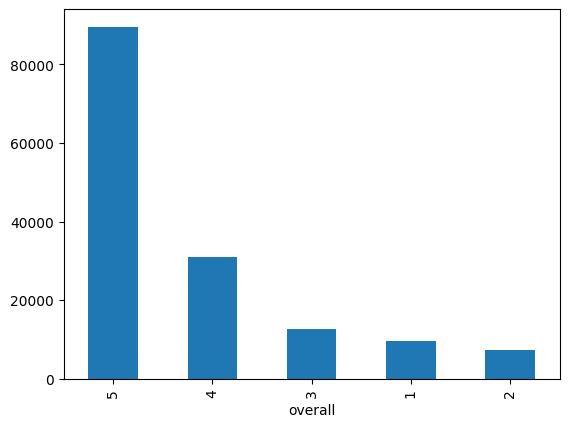

In [9]:
df.overall.value_counts().plot.bar()

In [10]:
df['reviewText']=df['reviewText'].str.lower() #kucuk harfe cevirme
df['reviewText']=df['reviewText'].str.replace('[^\w\s]','') #noktalama isaretlerini kaldirma
df['reviewText']=df['reviewText'].str.replace('\d+','') # rakamlari silme
df['reviewText']=df['reviewText'].str.replace('\n','').replace('\r','') # yeni satir ve entera basilan yerleri kaldirma

In [11]:
df["reviewText"].iloc[0]

"it's quite small, but really slow.on sequential write, the speed slowly goes up from 55k/s to 4.8m/s over the course of 1gb.on small files, the write speed is even worse, it stays below 3m/s all the time.this is incredibly slow for a modern usb stick.read is fine at about 20 m/s."

In [12]:
df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      2228
helpful              0
reviewText           0
overall              0
summary              0
unixReviewTime       0
reviewTime           0
dtype: int64

In [13]:
df.drop("reviewerName",axis=1,inplace=True)

In [14]:
df.isnull().sum()

reviewerID        0
asin              0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [15]:
df.head()

,reviewerID,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
662709,A3HAYQJBQ4UQV2,B002U1ZBG0,"[61, 66]","it's quite small, but really slow.on sequentia...",3,Small but very slow,1283472000,"09 3, 2010"
822293,A1YU56S5VFTZ,B003U2YCZE,"[7, 7]",i have tried nearly all of the typical offerin...,5,Simply The Finest Protection Around,1323475200,"12 10, 2011"
795999,ADZ2QODSMGAUG,B003M0NURK,"[0, 0]",does the job at a great price. i recommend &#...,5,"A nice, solid, adapter",1389657600,"01 14, 2014"
1518737,APG3SSTOY7039,B00ACF8XWA,"[0, 0]",the keyboard is very easy to use which is surp...,5,This is a very good keyboard and Case,1395705600,"03 25, 2014"
1249738,A2LFWJ8X817QGX,B006W8U2MU,"[0, 0]",this is a great thumb drive - it is made of me...,5,Works perfect,1387756800,"12 23, 2013"


In [16]:
df.drop("reviewerID",axis=1,inplace=True)

In [17]:
df.head()

,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
662709,B002U1ZBG0,"[61, 66]","it's quite small, but really slow.on sequentia...",3,Small but very slow,1283472000,"09 3, 2010"
822293,B003U2YCZE,"[7, 7]",i have tried nearly all of the typical offerin...,5,Simply The Finest Protection Around,1323475200,"12 10, 2011"
795999,B003M0NURK,"[0, 0]",does the job at a great price. i recommend &#...,5,"A nice, solid, adapter",1389657600,"01 14, 2014"
1518737,B00ACF8XWA,"[0, 0]",the keyboard is very easy to use which is surp...,5,This is a very good keyboard and Case,1395705600,"03 25, 2014"
1249738,B006W8U2MU,"[0, 0]",this is a great thumb drive - it is made of me...,5,Works perfect,1387756800,"12 23, 2013"


In [18]:
df.head()

,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
662709,B002U1ZBG0,"[61, 66]","it's quite small, but really slow.on sequentia...",3,Small but very slow,1283472000,"09 3, 2010"
822293,B003U2YCZE,"[7, 7]",i have tried nearly all of the typical offerin...,5,Simply The Finest Protection Around,1323475200,"12 10, 2011"
795999,B003M0NURK,"[0, 0]",does the job at a great price. i recommend &#...,5,"A nice, solid, adapter",1389657600,"01 14, 2014"
1518737,B00ACF8XWA,"[0, 0]",the keyboard is very easy to use which is surp...,5,This is a very good keyboard and Case,1395705600,"03 25, 2014"
1249738,B006W8U2MU,"[0, 0]",this is a great thumb drive - it is made of me...,5,Works perfect,1387756800,"12 23, 2013"


In [19]:
df['reviewText']=df['reviewText'].str.lower() #kucuk harfe cevirme
df['reviewText']=df['reviewText'].str.replace('[^\w\s]','') #noktalama isaretlerini kaldirma
df['reviewText']=df['reviewText'].str.replace('\d+','') # rakamlari yoketme
df['reviewText']=df['reviewText'].str.replace('\n','').replace('\r','') # yeni satir ve entera basilan yerleri kaldirma

In [20]:
df["reviewText"].iloc[0]

"it's quite small, but really slow.on sequential write, the speed slowly goes up from 55k/s to 4.8m/s over the course of 1gb.on small files, the write speed is even worse, it stays below 3m/s all the time.this is incredibly slow for a modern usb stick.read is fine at about 20 m/s."

In [21]:
df.head()

,asin,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
662709,B002U1ZBG0,"[61, 66]","it's quite small, but really slow.on sequentia...",3,Small but very slow,1283472000,"09 3, 2010"
822293,B003U2YCZE,"[7, 7]",i have tried nearly all of the typical offerin...,5,Simply The Finest Protection Around,1323475200,"12 10, 2011"
795999,B003M0NURK,"[0, 0]",does the job at a great price. i recommend &#...,5,"A nice, solid, adapter",1389657600,"01 14, 2014"
1518737,B00ACF8XWA,"[0, 0]",the keyboard is very easy to use which is surp...,5,This is a very good keyboard and Case,1395705600,"03 25, 2014"
1249738,B006W8U2MU,"[0, 0]",this is a great thumb drive - it is made of me...,5,Works perfect,1387756800,"12 23, 2013"


In [22]:
df.overall.value_counts().sort_values(ascending=False)

overall
5    89536
4    30920
3    12624
1     9644
2     7276
Name: count, dtype: int64

In [23]:
df=df.dropna()

In [24]:
df.isnull().sum()

asin              0
helpful           0
reviewText        0
overall           0
summary           0
unixReviewTime    0
reviewTime        0
dtype: int64

In [25]:
df.shape

(150000, 7)

In [26]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    wc=WordCloud(background_color=bgcolor)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

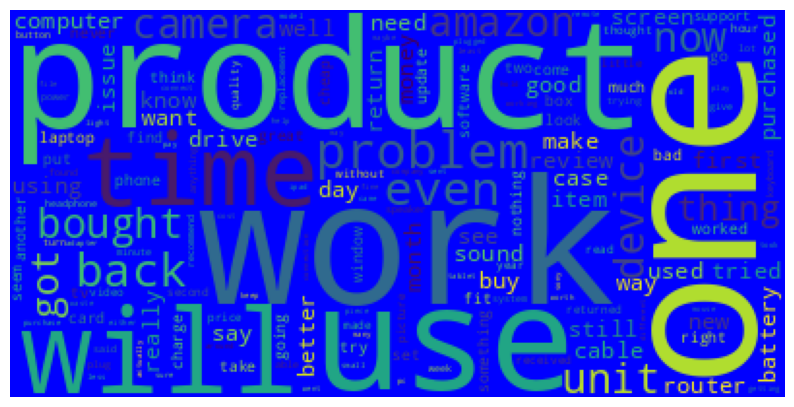

In [27]:
Text1=df.query("overall==1")['reviewText']
wc(Text1,'blue')

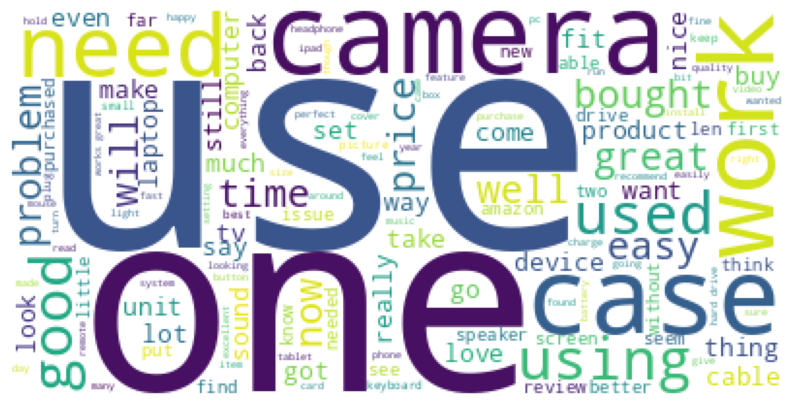

In [28]:
Text1=df.query("overall==5")['reviewText']
wc(Text1,'white')

In [29]:
from wordcloud import WordCloud, STOPWORDS

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
from nltk.stem import PorterStemmer

In [32]:
ps=PorterStemmer()

In [33]:
df.columns

Index(['asin', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime',
       'reviewTime'],
      dtype='object')

In [34]:
x=df[['asin', 'helpful', 'summary', 'unixReviewTime',
       'reviewTime']]

y=df[['overall', 'reviewText']]

In [35]:
y.head()

,overall,reviewText
662709,3,"it's quite small, but really slow.on sequentia..."
822293,5,i have tried nearly all of the typical offerin...
795999,5,does the job at a great price. i recommend &#...
1518737,5,the keyboard is very easy to use which is surp...
1249738,5,this is a great thumb drive - it is made of me...


<Axes: xlabel='overall', ylabel='count'>

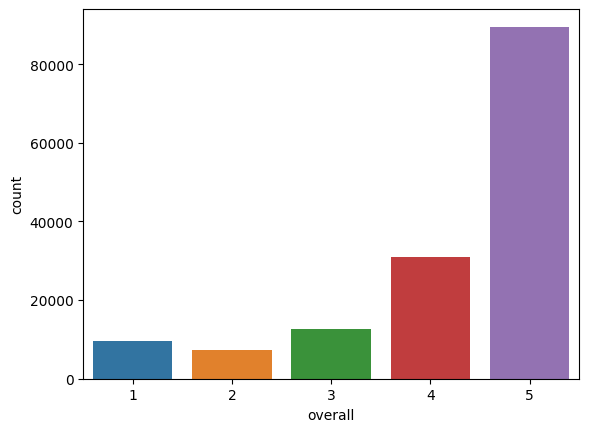

In [36]:
sns.countplot(x=df['overall'])

In [37]:
iyivekotu=y[(y['overall']==5)| (y['overall']==1)]

In [38]:
iyivekotu.head(10)

,overall,reviewText
822293,5,i have tried nearly all of the typical offerin...
795999,5,does the job at a great price. i recommend &#...
1518737,5,the keyboard is very easy to use which is surp...
1249738,5,this is a great thumb drive - it is made of me...
11038,5,the canon rc-1 wireless remote stores attached...
457026,5,i have had this processor in my computer for a...
1500679,5,"if i had to find one fault, it's in the price...."
764753,5,this cable is very well built and is great for...
205681,5,like the previous reviewer i appreciated the i...
1141148,5,this external hd was super simple to setup and...


In [39]:
iyivekotu.shape

(99180, 2)

In [40]:
iyivekotu.reset_index(drop=True,inplace=True)

In [41]:
yes=iyivekotu[iyivekotu['overall']=='5']['reviewText']
no=iyivekotu[iyivekotu['overall']=='1']['reviewText']

In [42]:
x=iyivekotu["reviewText"]
y=iyivekotu["overall"]

In [43]:
vect=CountVectorizer(ngram_range=(1,2),stop_words='english')

In [44]:
x=vect.fit_transform(x)

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

In [46]:
tf=pd.DataFrame(x_train.toarray(),columns=vect.get_feature_names_out())

In [63]:
model=lr.fit(x_train,y_train)

In [64]:
pred=lr.predict(x_test)

In [65]:
accuracy_score(pred,y_test)

0.9563420044363783

In [66]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           1       0.68      0.85      0.75      1558
           5       0.99      0.97      0.98     18278

    accuracy                           0.96     19836
   macro avg       0.83      0.91      0.86     19836
weighted avg       0.96      0.96      0.96     19836

